In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [19]:
df_counts = pd.read_csv('CB-Final_2.csv')
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270


In [21]:
df_counts['perc_occupied'] = df_counts['occupied_unit'] / (df_counts['occupied_unit'] + df_counts['vacant_unit']) * 100
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437


In [22]:
df_counts['perc_occupied'].describe()

count    55.000000
mean     92.539092
std       4.081856
min      78.846572
25%      91.484512
50%      93.779047
75%      94.933772
max      98.091137
Name: perc_occupied, dtype: float64

In [23]:
#exclude row where name = 'Manhattan 5&6'
df_counts = df_counts[df_counts['name'] != 'Manhattan 5&6']
df_counts = df_counts[df_counts['name'] != 'Manhattan 1&2']
df_counts


,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437
5,1,Bronx 4,88,75,13,9,5,4,0.536684,42963,34.6,45.3,139747,52840,2032,74275,42620,905,2381,40239,0.021234,0.059171,80,0.378112,0.014541,0.531496,0.572463,5.586579,97.920735
6,1,Bronx 5,68,57,11,14,14,0,0.496395,32049,38.0,41.0,114828,32444,7514,96713,52601,3000,2917,49684,0.057033,0.058711,71,0.282544,0.065437,0.842242,0.618316,5.545522,94.604414
7,1,Bronx 7,63,78,0,18,12,6,0.589213,23874,28.6,43.2,132380,17907,4578,41210,38455,1328,15921,22534,0.034534,0.706532,90,0.135270,0.034582,0.311301,0.679861,41.401638,96.661891
8,1,Bronx 8,36,36,0,12,12,0,0.412466,76271,10.6,41.0,87280,64141,18951,109540,70168,5886,15963,54205,0.083884,0.294493,48,0.734888,0.217129,1.255041,0.549954,22.749686,92.260762
9,1,Bronx 9,78,54,24,15,15,0,0.292298,46904,23.7,42.6,184743,79924,3802,105892,62497,2098,3180,59317,0.033570,0.053610,69,0.432623,0.020580,0.573185,0.373492,5.088244,96.752071


In [24]:
%%R -i df_counts

head(df_counts)

  code      name Tobacco Retail Dealer Cap
0    1 Bronx 1&2                        99
1    1  Bronx 10                        52
2    1  Bronx 11                        55
3    1  Bronx 12                        66
4    1 Bronx 3&6                       103
5    1   Bronx 4                        88
  Active Tobacco Retail Dealer Licenses TRD Available Under Cap
0                                    75                      24
1                                    65                       0
2                                    60                       0
3                                    64                       2
4                                    91                      12
5                                    75                      13


  Electronic Cigarette Retail Dealer Cap
0                                     18
1                                     30
2                                     19
3                                     21
4                                     15
5                                      9
  Active Electronic Cigarette Retail Dealer Licenses ECD Available Under Cap
0                                                 15                       3
1                                                 37                       0
2                                                 22                       0
3                                                 28                       0
4                                                 16                       2
5                                                  5                       4
  activer per 1000 income poverty age_med population black_population
0        0.5123581  31651    32.8    41.6     146382            61300
1        0.4746951  61426    18.9 

In [48]:
%%R

model <- lm(total_count ~ age_med + black_pct + asian_pct + hispanic_pct + perc_occupied + income, data = df_counts)
summary(model)


Call:
lm(formula = total_count ~ age_med + black_pct + asian_pct + 
    hispanic_pct + perc_occupied + income, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.472 -19.160  -3.718  12.146  65.549 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.258e+02  1.284e+02   4.095 0.000169 ***
age_med       -1.437e-01  9.362e-01  -0.154 0.878664    
black_pct     -7.758e+01  2.323e+01  -3.340 0.001670 ** 
asian_pct      2.439e+00  4.223e+01

   0.058 0.954185    
hispanic_pct   1.687e+00  2.137e+01   0.079 0.937412    
perc_occupied -4.323e+00  1.383e+00  -3.125 0.003080 ** 
income         5.600e-06  1.862e-04   0.030 0.976137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.88 on 46 degrees of freedom
Multiple R-squared:  0.4313,	Adjusted R-squared:  0.3571 
F-statistic: 5.813 on 6 and 46 DF,  p-value: 0.0001436



In [49]:
%%R

model <- lm(total_count ~ age_med + black_pct + asian_pct + hispanic_pct + perc_owners + perc_occupied + income, data = df_counts)
summary(model)


Call:
lm(formula = total_count ~ age_med + black_pct + asian_pct + 
    hispanic_pct + perc_owners + perc_occupied + income, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.831 -18.762  -5.276  14.745  65.318 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.439e+02  1.346e+02   4.041 0.000205 ***
age_med       -2.429e-01  9.652e-01  -0.252 0.802431    
black_pct     -7.875e+01  2.354e+01  -3.345 0.001667 ** 
asian_pct     -3.396e+00  4.420e+01  -0.077 0.939092    
hispanic_pct   5.632e+00  2.299e+01   0.245 0.807556    
perc_owners    1.527e-01  3.100e-01   0.492 0.624803    
perc_occupied -4.495e+00  1.438e+00  -3.125 0.003106 ** 
income        -3.496e-05  2.050e-04  -0.171 0.865356    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.13 on 45 degrees of freedom
Multiple R-squared:  0.4343,	Adjusted R-squared:  0.3463 
F-statistic: 4.936 on 7 and 45

 DF,  p-value: 0.0003373



`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ perc_occupied, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.586 -18.669  -0.905  13.211  76.416 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    568.830    123.291   4.614  2.7e-05 ***
perc_occupied   -5.065      1.326  -3.820 0.000364 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.29 on 51 degrees of freedom
Multiple R-squared:  0.2224,	Adjusted R-squared:  0.2072 
F-statistic: 14.59 on 1 and 51 DF,  p-value: 0.000364



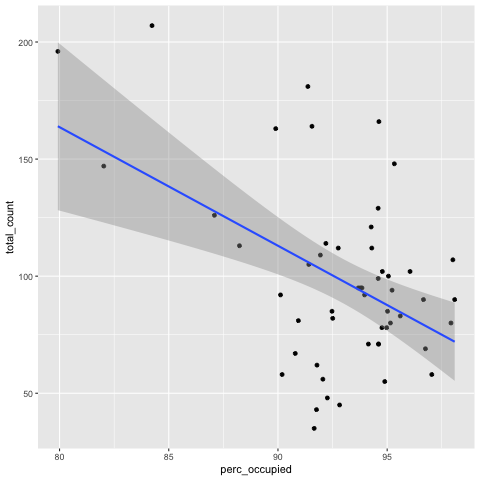

In [32]:
%%R

plot <- ggplot(df_counts, aes(x = perc_occupied, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ perc_occupied, data = df_counts)
summary(model)


Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



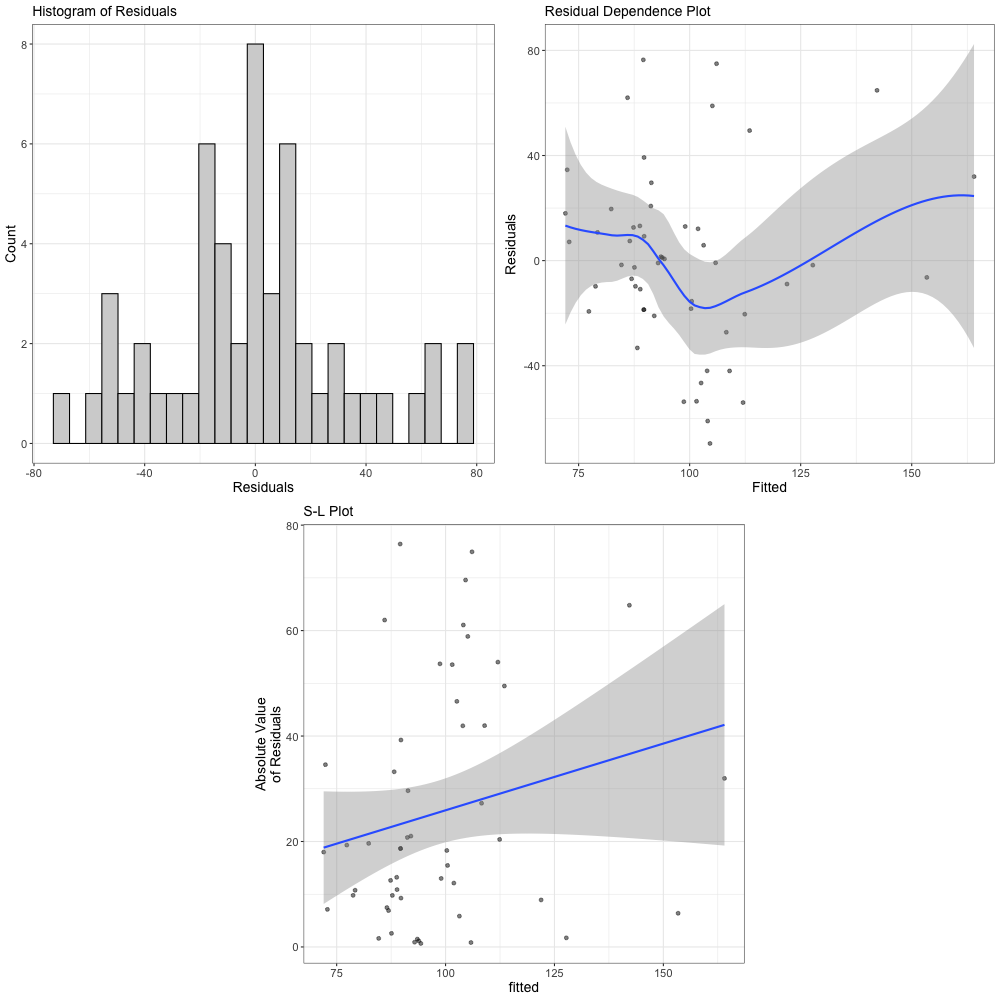

In [33]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")

In [35]:
%%R

require(tidyverse)

In [39]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df_counts %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

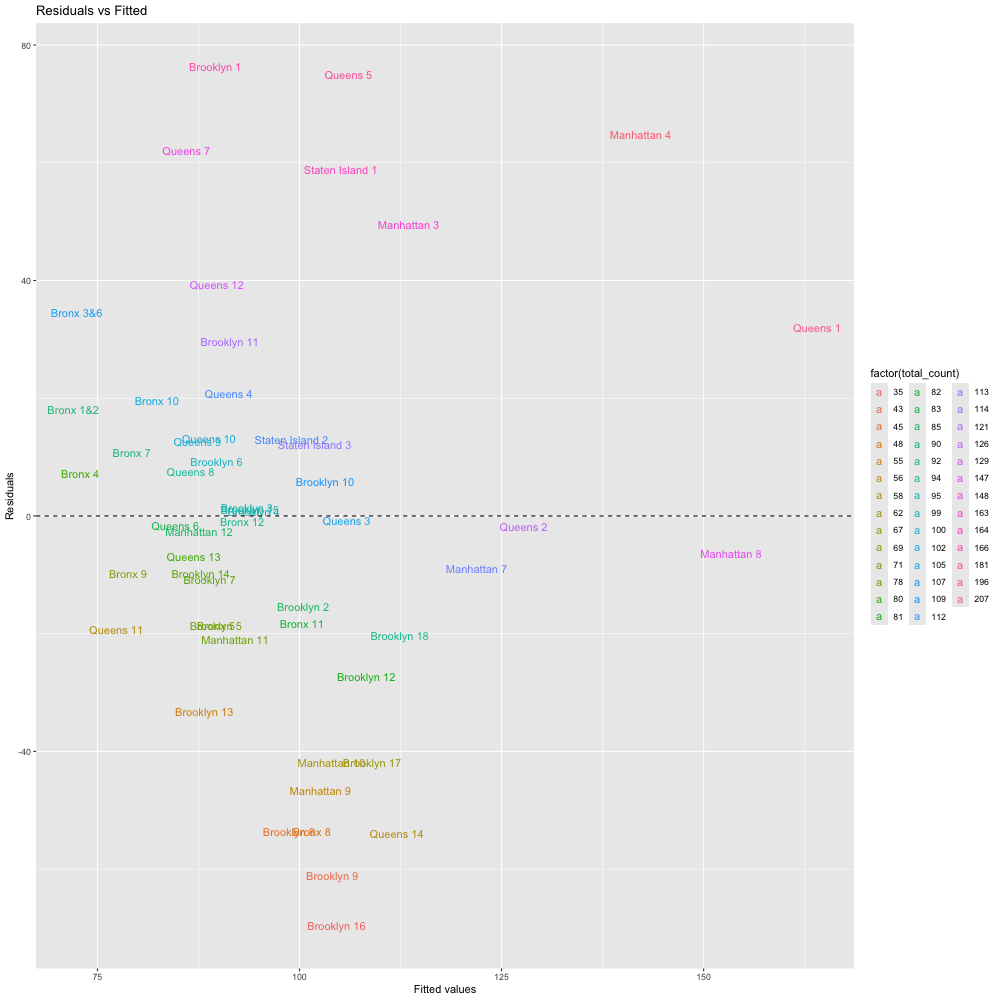

In [40]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=factor(total_count)) + 
    # geom_point() + 
    geom_text(aes(label = name)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

In [42]:
df_counts[df_counts['name'] == 'Queens 1']

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
38,4,Queens 1,106,131,0,46,65,0,0.739632,81167,16.1,41.6,177115,21301,34324,44477,80758,20287,15196,65562,0.251207,0.231781,196,0.120266,0.193795,0.251119,1.106626,18.816712,79.922807


# model the caps

In [43]:
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437


In [44]:
df_counts['total_caps'] = df_counts['Tobacco Retail Dealer Cap'] + df_counts['Electronic Cigarette Retail Dealer Cap']
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners,perc_occupied,total_caps
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088,98.091137,117
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190,96.047715,82
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644,92.506119,74
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692,93.965531,87
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270,98.007437,118


In [46]:
%%R -i df_counts

names(df_counts)

 [1] "code"                                              
 [2] "name"                                              
 [3] "Tobacco Retail Dealer Cap"                         
 [4]

 "Active Tobacco Retail Dealer Licenses"             
 [5] "TRD Available Under Cap"                           
 [6] "Electronic Cigarette Retail Dealer Cap"            
 [7] "Active Electronic Cigarette Retail Dealer Licenses"
 [8] "ECD Available Under Cap"                           
 [9] "activer per 1000"                                  
[10] "income"                                            
[11] "poverty"                                           
[12] "age_med"                                           
[13] "population"                                        
[14] "black_population"                                  
[15] "asian_population"                                  
[16] "hispanic_population"                               
[17] "occupied_unit"                                     
[18] "vacant_unit"                                       
[19] "owner"                                             
[20] "renter"                                            
[21] "vacant_occup

In [47]:
%%R

model <- lm(total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + perc_occupied, data = df_counts)
summary(model)


Call:
lm(formula = total_caps ~ age_med + black_pct + asian_pct + hispanic_pct + 
    perc_occupied, data = df_counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.316 -19.415  -6.271  16.366  72.343 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   295.7583   107.3415   2.755  0.00832 **
age_med        -0.1998     0.8849  -0.226  0.82238   
black_pct     -42.8433    21.4002  -2.002  0.05107 . 
asian_pct     -49.4325    39.9049  -1.239  0.22159   
hispanic_pct    9.3116    19.1411   0.486  0.62890   
perc_occupied  -1.9503     1.2292  -1.587  0.11929   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.2 on 47 degrees of freedom
Multiple R-squared:  0.1507,	Adjusted R-squared:  0.06032 
F-statistic: 1.668 on 5 and 47 DF,  p-value: 0.161

